# Parte 1

### Integrantes: Fernanda Weiss y Fabián Fernández

En el presente se trabajará con el dataset *House Sales in King County, USA* el cuál se utilizará en el presente trabajo para evaluar modelos simples de regresión líneal. El dataset nos entrega información sobre distintas características asociadas a las ventas de casas en la localidad King County, en el rango de un año (entre mayo de 2014 y mayo de 2015), como la cantidad de habitaciones, cantidad de baños, número de pisos, etc.

### a) Construcción de dataset

[//]: <> (a. Construya un dataframe con los datos a analizar descargándolos desde la plataforma como se indic´o. Explique por qu´e se realiza la l´ınea 4.)

Comenzaremos construyendo un dataframe con los datos descritos previamente. 

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("kc_house_data.csv")
df.drop(['id','date','zipcode',],axis=1,inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900,3,1.00,1180,5650,1,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000,3,2.25,2570,7242,2,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000,2,1.00,770,10000,1,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000,4,3.00,1960,5000,1,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000,3,2.00,1680,8080,1,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


Es importante notar que al construir el dataframe se realiza una modificación a los datos originales en la línea 4, la que realiza lo siguiente:

* Se eliminan las columnas que no agregan valor al análisis que se realizará, estas columnas son el *identificador (id), fecha (date) y cógido zip* (zipcode), esto es, no será posible realizar una estimación del precio con estas variables.



* Mediante la opción *axis=1* se especifica el eje a través del cual se hará la acción, es decir en fila o columna. Por defecto se tiene *axis=0* que indica que se realice por fila, al indicar *axis=1* se indica que se realice por columna.
[//]: <> (It specifies the axis along which the means are computed. By default axis=0. This is consistent with the numpy.mean usage when axis is specified explicitly -in numpy.mean, axis==None by default, which computes the mean  value over the flattened array , in which axis=0 along the rows -namely, index in pandas, and axis=1 along the columns. https://stackoverflow.com/questions/22149584/what-does-axis-in-pandas-mean Note: axis=1 denotes that we are referring to a column, not a row )
* Mediante la opción *inplace* se indica que la modificación se realice directamente en el dataframe, sin tener que reasignarlo.
[//]: <> (https://stackoverflow.com/questions/13411544/delete-column-from-pandas-dataframe-using-python-del)

### b) Descripción de dataset

[//]: <> (b. Describa brevemente el dataset a utilizar.)
Luego se describe brevemente el dataset a utilizar.

In [2]:

#Return a tuple representing the dimensionality of the DataFrame
print "info"
df.info()


info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 0 to 21612
Data columns (total 18 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(13)
memory usage: 3.1 MB


Con df.info() es posible ver la información asociada a cada columna, la cantidad de datos, si tiene algún dato nulo, y el tipo de dato. Los atributos para predecir el valor de una casa están especificados como:

<ul>
    <li><strong>price</strong> : Corresponda al precio de la casa, es la predicción objetivo del modelo. </li>
    <li><strong>bedrooms</strong> : Número de dormitorios por casa. </li>
    <li><strong>bathrooms</strong> : Número de baños por dormitorio.</li>
    <li><strong>sqft_living</strong> : Pies cuadrados de la casa. </li>
    <li><strong>sqft_lot</strong> : Pies de cuadrados del terreno. </li>
    <li><strong>floors</strong> : Total de pisos en la casa. </li>
    <li><strong>waterfront</strong> : Casa que tiene una vista al mar. </li>
    <li><strong>view</strong> : Cantidad de veces que ha sido vista la casa. </li>
    <li><strong>condition</strong> : Que tan buena es la condición de la casa. </li>
    <li><strong>grade</strong> : grado general dado a la unidad de vivienda, basado en el sistema de clasificación del condado        de King.  </li>
    <li><strong>sqft_above</strong>: Pies cuadrados aparte del sótano. </li>
    <li><strong>sqtf_basement</strong> : Pies cuadrados del sótano. </li>
    <li><strong>yr_built</strong> : Año de construcción de la vivienda. </li>
    <li><strong>yr_renovate</strong> : Año en que la casa fue renovada. </li>
    <li><strong>lat</strong> : Coordenada de latitud. </li>
    <li><strong>long</strong> : Coordenada de longitud. </li>
    <li><strong>sqft_living15</strong>: Área de la sala de estar en 2015 ( implica alguna renovación). Esto podría o no haber       afectado al área del terreno. </li>
    <li><strong>sqft_lot15</strong> : Área del tamaño del terreno en 2015 ( implica alguna renovación).</li>
</ul>


In [3]:
print "shape:",df.shape

shape: (21613, 18)


El comando df.shape visualiza la dimensión del dataframe. La cual consiste en 21613 datos entre el conjunto de entrenamiento y de prueba. Cada dato contiene 18 atributos, los anteriormente descritos.

In [4]:
print "Descripción"
df.describe()


Descripción


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,540088.141767,3.370842,2.114757,2079.899736,15106.967566,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,367127.196483,0.930062,0.770163,918.440897,41420.511515,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,75000.000000,0.000000,0.000000,290.000000,520.000000,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,321950.000000,3.000000,1.750000,1427.000000,5040.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,450000.000000,3.000000,2.250000,1910.000000,7618.000000,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,645000.000000,4.000000,2.500000,2550.000000,10688.000000,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7700000.000000,33.000000,8.000000,13540.000000,1651359.000000,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


Se ven las 18 columnas que contiene el dataframe, además podemos observar las características de cada una de ellas, como la cantidad de registros para cada una, el promedio, desviación estándar, mínimo, máximo y los percentiles 20, 50 y 75.

Cada columna indica una característica de la casa en venta. Se puede observar que existen 21.613 registros de casas, en las cuales se cumple que no existen valores nulos y son valores númericos, donde la mayoría son enteros, excepto cinco características entre las que se encuentran los baños y pisos, lo que es extraño que no sean valores enteros. 

### c) Normalización de datos y transformación variable a predecir

[//]: <> (c. Normalice los datos antes de trabajar y aplique una transformación adecuada a la variable a predecir. Explique la importancia/conveniencia de realizar estas dos operaciones.)

A continuación se procede a normalizar los datos y aplicar una transformación a la variable precio:

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled['price'] = np.log(df['price'])  #creo que esta es la transformación 


Se creó un nuevo dataframe en base al anterior, pero normalizado. Ésta transformación centra los valores con media 0 y los escala en una varianza unitaria.

Es importante mencionar que es conveniente hacer estas operaciones dado que en varias funciones objetivos del ámbito de maching learning, se utilizan elementos que asumen que todas las características están centradas en 0, como por ejemplo regularizadores y kernels. Además es importante que las varianzas estén en el mismo orden, pues de lo contrario alguna de las características podría predominar dentro de la función objetivo, y así la máquina no puede aprender correctamentemente las otras características.

Por otro lado, se debe destacar la transformación posterior que se le realizó a la característica del precio, la cual consiste en una linealización de los datos al aplicar la función logarítmica. Esto es, ya que no se sabe a priori el comportamiento de la variable **precio**, dado que  puede ser cuadrática, cúbica o de otro grado, como la regresión precide una variable lineal, se tiene que dejar de esta forma para que el modelo propuesto sea válido.

### d) Regresión lineal de mínimos cuadrados básica

[//]: <> (d Realice una regresión lineal de mínimos cuadrados básica. Explique la importancia/conveniencia del paso 4 y los argumentos que se deben entregar a la función que implementa la regresión lineal. http://sebastianraschka.com/Articles/2014_about_feature_scaling.html#standardization-and-min-max-scaling)

Se procede a realizar una regresión líneal de mínimos cuadrados básica,

In [7]:
import sklearn.linear_model as lm
X = df_scaled.iloc[:,1:] #use .ix instead, in older pandas version
N = X.shape[0]
X.insert(X.shape[1], 'intercept', np.ones(N)) ##Agregamos interceptos a matriz X
y = df_scaled['price']  #Variable transformada!!!!!
#mascara estatica con el 70% de los datos
mascara = np.zeros(len(X))
limit = int(len(X)*0.7)
mascara[:limit] = 1
istrain = mascara== 1
# Acá toma el 70% de los datos para entrenar.
# Define el conjunto de entrenamiento
Xtrain = X[istrain]
ytrain = y[istrain]

#Define el conjunto de test
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]

linreg = lm.LinearRegression(fit_intercept = False)
modelo = linreg.fit(Xtrain, ytrain)

Es importante destacar, que en la línea 4 se añaden una nueva columna al dataframe con coeficientes unitarios la cual permitirá que se agreguen los interceptos sin alteración de estos en la regresión lineal.
El argumento que se debe entregar a la función es fit_intercept con valor falso, dado que los interceptos ya fueron considerados según la explicación anterior. 

###  e) Pesos y Z-score

A continuación se presenta una tabla con los pesos y Z-score correspondientes a cada predictor.

In [8]:
from numpy import linalg as LA
def getStandardRegressionError(linreg, Xtrain , ytrain ):
   std_reg = np.sqrt(((linreg.predict(Xtrain) - ytrain) ** 2).sum()/21594)
   return std_reg

def getZscore(linreg,std_reg,K):
   inverse_covariance = np.linalg.inv(Xtrain.transpose().dot(Xtrain))
   z_score = np.ones(K)
   for i in range(0,K):
      z_score[i] = linreg.coef_[i]/(std_reg *np.sqrt((inverse_covariance[i,i])))
      
   return z_score 

st_error = getStandardRegressionError(modelo,Xtrain,ytrain)
#print(regresion_error)

cantidad_variables = (len(modelo.coef_[:]))

Z_score = getZscore(modelo,st_error,cantidad_variables)
nombres = list(Xtrain.columns[:-1])
nombres.append('intercept')
def do_table(nombres,modelo,Z_score):
    cantidad_variables = (len(modelo.coef_[:]))
    for i in range(cantidad_variables):
        print('<tr><td>'+nombres[i]+'</td><td>'+str(round(modelo.coef_[i],4))+'</td><td>'+str(round(Z_score[i],4))+'</td></tr>')
    
#do_table(nombres,modelo,Z_score)

<table style="width:100%">
<tr>
        <th>Atributo</th>
        <th>Coeficiente</th>
        <th>Z-score</th>
</tr>
<tr><td>bedrooms</td><td>-0.0071</td><td>-3.1244</td></tr>
<tr><td>bathrooms</td><td>0.057</td><td>17.8574</td></tr>
<tr><td>sqft_living</td><td>-3.54349922406e+12</td><td>-31427226.961</td></tr>
<tr><td>sqft_lot</td><td>0.0225</td><td>9.2179</td></tr>
<tr><td>floors</td><td>0.0372</td><td>14.5084</td></tr>
<tr><td>waterfront</td><td>0.0333</td><td>17.5574</td></tr>
<tr><td>view</td><td>0.0424</td><td>20.9556</td></tr>
<tr><td>condition</td><td>0.0458</td><td>24.809</td></tr>
<tr><td>grade</td><td>0.1844</td><td>56.904</td></tr>
<tr><td>sqft_above</td><td>3.19491406164e+12</td><td>31427226.961</td></tr>
<tr><td>sqft_basement</td><td>1.70752884084e+12</td><td>31427226.961</td></tr>
<tr><td>yr_built</td><td>-0.1101</td><td>-40.4754</td></tr>
<tr><td>yr_renovated</td><td>0.0146</td><td>8.1521</td></tr>
<tr><td>lat</td><td>0.1858</td><td>102.2836</td></tr>
<tr><td>long</td><td>-0.0043</td><td>-1.9904</td></tr>
<tr><td>sqft_living15</td><td>0.0883</td><td>28.9337</td></tr>
<tr><td>sqft_lot15</td><td>-0.0082</td><td>-3.2716</td></tr>
<tr><td>intercept</td><td>13.0395</td><td>7435.1966</td></tr>
</table>

In [9]:
print "Condicionamiento de la matriz X:", LA.cond(Xtrain)

Condicionamiento de la matriz X: 1.34670390958e+16


Observando la tabla anterior, es posible dar cuenta de existen cosas anómalas en el resultado de la regresión lineal. Por ejemplo, los atributos *sqft_living, sqft_above y sqft_basement* tienen un peso y z-score demasiado alto en comparación al resto de las características. 

Lo anterior es atribuible al mal condicionamiento de la matriz, que es de $3,21 \cdot 10^{15}$, valor que está muy lejana al 1 que es el valor que implica que la matriz esté bien condicionada. Este mal condicionamiento de la matriz puede ser porque existen características que son linealmente dependientes de otras. El gran valor del número de condicionamiento implica que esta matriz está muy cercana a hacer singular ( no invertible ) y el cálculo de su inversa, o solución de un sistema lineal de ecuaciones es propenso a grandes errores numéricos.

Para ver las variables que están más correlacionadas con la respuesta, podemos suponer una hipótesis nula tal que  $H_{0} :B _{j}= 0$ , la cual se acepta o rechaza dependiendo de los valores de Z-scores:

$z_{j}= \frac{B_{j}}{\lambda \sqrt{v_{jj}}}$

Donde,

$v_{jj} = (X^{T}X)^{-1}_{jj}$

Esto lo hacemos al 5% con la distribución t con 21593 grados de libertad, bajo esto, todo valor absoluto de Z-score mayor a 1.645 conllevará un rechazo a la hipotesis nula, implicando que su coeficiente es no nulo, por ende estará correlacionado con la respuesta. Con este criterio, todos los atributos serían relevantes pero está sesgado al mal condicionamiento de la matriz.	

### f) Método de corrección de lo observado

Para corregir lo anterior, se podrían aplicar dos métodos por lo bajo:
1. Encontrar las características linealmente dependientes de otras y eliminarlas.
2. Aplicar un regularizador que afecte lo menos posible a la regresión lineal original, pero que aún así arregle los atributos inconsistentes.

De las opciones anteriores se escogerá la segunda, debido que la primera requiere mucho costo computacional para encontrar las características linealmente dependientes, y además, el hecho de eliminar características por completo,  consideramos una medida demasiado radical.

Por lo tanto, se aplica un regularizador de Ridge con un lambda lo más pequeño posible. Para obtener este pequeño valor, se obtienen los valores propios de la matriz original, así el más diminuto se considera como el parámetro lambda para la regularización de Ridge.


Se sabe que para obtener los valores propios de una matriz, ésta debe ser cuadrada, sin embargo nuestra matriz es rectangular de 21613 x 18. Por lo tanto, se calculan los valores propios de la matriz original por su transpuesta. El resultado anterior, no dará el valor exacto del menor valor propio, pero si dará un valor aproximado de este, que es lo que buscamos.

In [12]:
from sklearn.linear_model import Ridge 

Z = Xtrain.transpose().dot(Xtrain)
[V, D] = LA.eig(Z)
min_eigenvalue =  min(V) # Equivale al valor propio de la matriz

#https://stackoverflow.com/questions/22631956/how-to-find-eigenvalues-for-non-quadratic-matrix
clf = Ridge(alpha=min_eigenvalue,fit_intercept=False)
modelo_regularizado = clf.fit(Xtrain, ytrain)
st_error_reg = getStandardRegressionError(modelo_regularizado,Xtrain,ytrain)
Z_score_reg = getZscore(modelo_regularizado,st_error_reg,cantidad_variables)


#for i in range(cantidad_variables):
    #print(round(Z_score[i],2),round(modelo.coef_[i],2),
          #round(Z_score_reg[i],2),round(modelo_regularizado.coef_[i],2))
    
#do_table(nombres,modelo_regularizado,Z_score_reg)

    


<table style="width:100%">
<tr>
        <th>Atributo</th>
        <th>Coeficiente</th>
        <th>Z-score</th>
</tr>
<tr><td>bedrooms</td><td>-0.0083</td><td>-3.6271</td></tr>
<tr><td>bathrooms</td><td>0.056</td><td>17.5207</td></tr>
<tr><td>sqft_living</td><td>0.4368</td><td>0.0</td></tr>
<tr><td>sqft_lot</td><td>0.0222</td><td>9.0825</td></tr>
<tr><td>floors</td><td>0.0376</td><td>14.6681</td></tr>
<tr><td>waterfront</td><td>0.0335</td><td>17.6757</td></tr>
<tr><td>view</td><td>0.0421</td><td>20.7899</td></tr>
<tr><td>condition</td><td>0.0453</td><td>24.5509</td></tr>
<tr><td>grade</td><td>0.1862</td><td>57.4635</td></tr>
<tr><td>sqft_above</td><td>-0.2946</td><td>-0.0</td></tr>
<tr><td>sqft_basement</td><td>-0.1509</td><td>-0.0</td></tr>
<tr><td>yr_built</td><td>-0.1099</td><td>-40.3952</td></tr>
<tr><td>yr_renovated</td><td>0.0148</td><td>8.2364</td></tr>
<tr><td>lat</td><td>0.1863</td><td>102.5644</td></tr>
<tr><td>long</td><td>-0.0041</td><td>-1.9006</td></tr>
<tr><td>sqft_living15</td><td>0.0859</td><td>28.1753</td></tr>
<tr><td>sqft_lot15</td><td>-0.007</td><td>-2.8055</td></tr>
<tr><td>intercept</td><td>13.0397</td><td>7436.2456</td></tr>
</table>

 
### Se puede hacer una tabla con Z scores antes y despúes, dan z-scores muy bajos, cuales podrian ser los que están mas correlacionados?!
Realizando la regresión lineal con el regularizador de Ridge, se puede ver mediante los nuevos pesos y z-score obtenidos que solo se modificaron los atributos que anteriormente tenían problemas, afectando de forma casi nula al resto, gracias al pequeño regularizador.

### g) Validación cruzada

### Modelo no regularizado

In [13]:
#K=5
yhat_test = linreg.predict(Xtest)
mse_test = np.mean(np.power(yhat_test - ytest, 2))
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
mse_cv = 0
for train, val in kf.split(Xm):
    linreg = lm.LinearRegression(fit_intercept = False)
    linreg.fit(Xm[train], ym[train])
    yhat_val = linreg.predict(Xm[val])
    mse_fold = np.mean(np.power(yhat_val - ym[val], 2))
    mse_cv += mse_fold
mse_cv_5 = mse_cv / 5
print "mse_test:",mse_test
print "mse_cv",mse_cv_5

mse_test: 0.0652592512373
mse_cv 0.0646912815639


In [14]:
#K = 10

yhat_test = linreg.predict(Xtest)
mse_test = np.mean(np.power(yhat_test - ytest, 2))
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
mse_cv = 0
for train, val in kf.split(Xm):
    linreg = lm.LinearRegression(fit_intercept = False)
    linreg.fit(Xm[train], ym[train])
    yhat_val = linreg.predict(Xm[val])
    mse_fold = np.mean(np.power(yhat_val - ym[val], 2))
    mse_cv += mse_fold
mse_cv_10 = mse_cv / 10
print "mse_test:",mse_test
print "mse_cv",mse_cv_10
print "Diferencia k=5 y k=10",(mse_cv_10 - mse_cv_5)

mse_test: 0.0652984978605
mse_cv 0.0646824320504
Diferencia k=5 y k=10 -8.84951349056e-06


In [15]:
yhat_test = linreg.predict(Xtest)
mse_test = np.mean(np.power(yhat_test - ytest, 2))
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()
from sklearn.model_selection import KFold
kf = KFold(n_splits=15)
mse_cv = 0
for train, val in kf.split(Xm):
    linreg = lm.LinearRegression(fit_intercept = False)
    linreg.fit(Xm[train], ym[train])
    yhat_val = linreg.predict(Xm[val])
    mse_fold = np.mean(np.power(yhat_val - ym[val], 2))
    mse_cv += mse_fold
mse_cv_15 = mse_cv / 15
print "Diferencia k=15 y k=10",(mse_cv_15 - mse_cv_10)

Diferencia k=15 y k=10 6.17680887617e-06


In [16]:
yhat_test = linreg.predict(Xtest)
mse_test = np.mean(np.power(yhat_test - ytest, 2))
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()
from sklearn.model_selection import KFold
kf = KFold(n_splits=10000)
mse_cv = 0
for train, val in kf.split(Xm):
    linreg = lm.LinearRegression(fit_intercept = False)
    linreg.fit(Xm[train], ym[train])
    yhat_val = linreg.predict(Xm[val])
    mse_fold = np.mean(np.power(yhat_val - ym[val], 2))
    mse_cv += mse_fold
mse_cv_1000 = mse_cv / 10000
print "Diferencia k=15 y k=10000",(mse_cv_1000 - mse_cv_15)

Diferencia k=15 y k=10000 1.39365222782e-05


### Modelo  regularizado

In [17]:
#K=5
yhat_test = linreg.predict(Xtest)
mse_test = np.mean(np.power(yhat_test - ytest, 2))
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
mse_cv = 0
for train, val in kf.split(Xm):
    clf = Ridge(alpha=min_eigenvalue,fit_intercept=False)
    modelo_regularizado = clf.fit(Xtrain, ytrain)
    yhat_val = modelo_regularizado.predict(Xm[val])
    mse_fold = np.mean(np.power(yhat_val - ym[val], 2))
    mse_cv += mse_fold
mse_cv_5 = mse_cv / 5
print "mse_test:",mse_test
print "mse_cv",mse_cv_5

mse_test: 0.0652556694575
mse_cv 0.0645164662505


In [18]:
#K = 10
yhat_test = linreg.predict(Xtest)
mse_test = np.mean(np.power(yhat_test - ytest, 2))
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
mse_cv = 0
for train, val in kf.split(Xm):
    clf = Ridge(alpha=min_eigenvalue,fit_intercept=False)
    modelo_regularizado = clf.fit(Xtrain, ytrain)
    yhat_val = modelo_regularizado.predict(Xm[val])
    mse_fold = np.mean(np.power(yhat_val - ym[val], 2))
    mse_cv += mse_fold
mse_cv_10 = mse_cv / 10
print "mse_test:",mse_test
print "mse_cv K=5:",mse_cv_5
print "mse_cv K=10:",mse_cv_10
print "Diferencia k=5 y k=10",(mse_cv_10 - mse_cv_5)
print "diferencia k=5 y mse_test",(mse_test - mse_cv_5)
print "diferencia k=10 y mse_test",(mse_test - mse_cv_10)

mse_test: 0.0652556694575
mse_cv K=5: 0.0645164662505
mse_cv K=10: 0.0645163259615
Diferencia k=5 y k=10 -1.40288987552e-07
diferencia k=5 y mse_test 0.000739203207038
diferencia k=10 y mse_test 0.000739343496025


En base a los errores de validación obtenidos, se puede concluir que al realizar validación cruzada con un 5 folds se obtiene un valor milésimas más cercano al error real del modelo que con 10 folds. Hay un cierto número de folds óptimo que puede predecir de mejor manera el error del modelo, luego de eso el error de validación se aleja del error real del modelo lentamente.

Hacer gráfico k=1 a 10 para encontrar k*

(h) Mida los errores de predicci´on para cada dato de entrenamiento. Utilizando un “quantile-quantile plot”
determine si es razonable la hip´otesis de normalidad sobre los residuos del modelo.

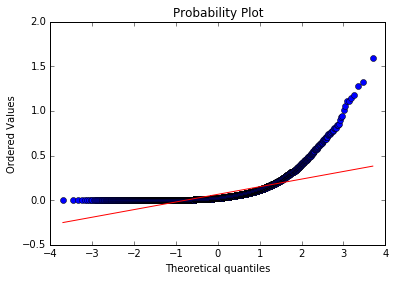

In [19]:
import pylab 
import scipy.stats as stats
yhat_test = linreg.predict(Xtest)

stats.probplot(np.power(yhat_test - ytest, 2), dist="norm", plot=pylab)
pylab.show()

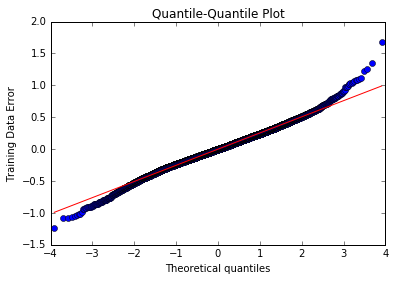

r2: 0.996998762774


In [21]:
import scipy.stats as stats
import matplotlib.pyplot as plt
def getQQPlot(Xtrain,ytrain):
   predict = linreg.predict(Xtrain)
   ytrain = np.asarray(ytrain)
   prediction_error = predict - ytrain 
   
   normal = stats.probplot(prediction_error, dist='norm', plot=plt)
   plt.ylabel('Training Data Error')
   plt.title('Quantile-Quantile Plot')
   plt.show()
   prediction_error.sort()
   norm= np.random.normal(0,2,len(predict))
   norm.sort()
   slope, intercept, r_value, p_value, std_err = stats.linregress(prediction_error,norm)
   print "r2:",r_value

getQQPlot(Xtrain,ytrain)


$R^{2}: 0.9970$

# Parte 2

(a) Construya una funcion que implemente Forward Step-wise Selection (FSS). Es decir, partiendo con un
modelo sin predictores (variables), agregue un predictor a la vez, re-ajustando el modelo de regresion
en cada paso. Para seleccionar localmente una variable, proponga/implemente un criterio distinto al
utilizado en el codigo de ejemplo. Construya un graco que muestre el error de entrenamiento y el error
de pruebas como funcion del numero de variables en el modelo. Ordene el eje x de menor a mayor.

In [ ]:
names_regressors = X.columns[:-1]
print names_regressors

In [ ]:
#Error cuadrado

def fss(x, y, names_x, k = 10000):
    p = x.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = range(0, p)
    selected = [p]
    current_score = best_new_score = 0.0
    while remaining and len(selected)<=k :
        score_candidates = []
        for candidate in remaining:
            model = lm.LinearRegression(fit_intercept=False)
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            predictions_train = model.fit(x_train, y).predict(x_train)
            residuals_train = predictions_train - y
            mse_candidate = np.mean(np.power(residuals_train, 2))
            score_candidates.append((mse_candidate, candidate))
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        best_new_score, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        print "selected = %s ..."%names_x[best_candidate]
        print "totalvars=%d, mse = %f"%(len(indexes),best_new_score)
    return selected
names_regressors = X.columns[:-1] #without intercept
fss(Xm,ym,names_regressors)

In [ ]:
#Error_Abs
def fss_abs(x, y, names_x, k = 10000):
    p = x.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = range(0, p)
    selected = [p]
    current_score = best_new_score = 0.0
    while remaining and len(selected)<=k :
        score_candidates = []
        for candidate in remaining:
            model = lm.LinearRegression(fit_intercept=False)
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            predictions_train = model.fit(x_train, y).predict(x_train)
            residuals_train = predictions_train - y
            mse_candidate = np.mean(np.fabs(residuals_train))
            score_candidates.append((mse_candidate, candidate))
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        best_new_score, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        print "selected = %s ..."%names_x[best_candidate]
        print "totalvars=%d, mse = %f"%(len(indexes),best_new_score)
    return selected
names_regressors = X.columns[:-1] #without intercept
fss_abs(Xm,ym,names_regressors)

In [ ]:
def fss_zscore(x, y, names_x, k = 10000):
    p = x.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = range(0, p)
    selected = [p]
    current_score = best_new_score = 0.0
    while remaining and len(selected)<=k :
        score_candidates = []
        for candidate in remaining:
            model = lm.LinearRegression(fit_intercept=False)
            indexes = selected + [candidate]
            x_train = x[:,indexes]
        
            # Cambio
            st_error = getStandardRegressionError(model,x_train,y)
            cantidad_variables = (len(selected)+1)
            zscore_candidate = abs(getZscore(modelo,st_error,cantidad_variables))[-1]
            predictions_train = model.fit(x_train,y).predict(x_train)
            residuals_train = predictions_train - y
            zscore_train_residual = np.mean(np.power(residuals_train,2))            
            score_candidates.append((zscore_candidate,candidate))
            
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        best_new_score, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        print "selected = %s ..."%names_x[best_candidate]
        print "totalvars=%d, mse = %f"%(len(indexes),best_new_score)
    return selected
names_regressors = X.columns[:-1] #without intercept
fss_zscore(Xm,ym,names_regressors)

In [ ]:
def fss_mse( x , y , xtest, ytest, names_x, k = 10000):
   p = x.shape[1] - 1
   k = min(p,k)
   names_x = np.array(names_x)
   remaining = range(1,p+1)
   training_error = []
   test_error = []
   selected = [0]
   current_score = 0.0
   best_new_score = 0.0

   while remaining and len(selected) <= k :
      score_candidates = []
      for candidate in remaining:
         model = lm.LinearRegression(fit_intercept = False)
         indexes = selected + [candidate]

         x_train = x[:,indexes]
         x_test = xtest[:,indexes]

         predictions_train = model.fit(x_train,y).predict(x_train)
         residuals_train = predictions_train - y

         predictions_test = model.fit(x_train,y).predict(x_test)
         residuals_test= predictions_test - ytest
         mse_train_candidate = np.mean(np.power(residuals_train,2))
         mse_test_candidate = np.mean(np.power(residuals_test,2))
         score_candidates.append((mse_train_candidate, mse_test_candidate ,candidate))

      score_candidates.sort()
      score_candidates[:] = score_candidates[::-1]
      best_new_score , test_score, best_candidate = score_candidates.pop()
      training_error.append(best_new_score)
      test_error.append(test_score)
      remaining.remove(best_candidate)
      selected.append(best_candidate)
      print  "selected = %s ..." %names_x[best_candidate-1]
      print  "totalvars = %d, mae = %f " %(len(indexes), best_new_score)
   return selected , training_error, test_error

#
#Forward Step-Wise Selection with Mean Absolute Error
#
def fss_mae( x , y , xtest, ytest, names_x, k = 10000):
   p = x.shape[1] - 1
   k = min(p,k)
   names_x = np.array(names_x)
   remaining = range(1,p+1)
   training_error = []
   test_error = []
   selected = [0]
   current_score = 0.0
   best_new_score = 0.0

   while remaining and len(selected) <= k :
      score_candidates = []
      for candidate in remaining:
         model = lm.LinearRegression(fit_intercept = False) 
         indexes = selected + [candidate]
         x_train = x[:,indexes]
         x_test = xtest[:,indexes]

         predictions_train = model.fit(x_train,y).predict(x_train)
         residuals_train = np.fabs(predictions_train - y)

         predictions_test = model.fit(x_train,y).predict(x_test)
         residuals_test = np.fabs(predictions_test - ytest)

         mae_training_candidate = np.mean(residuals_train)
         mae_test_candidate = np.mean(residuals_test)
         score_candidates.append((mae_training_candidate,mae_test_candidate , candidate))

      score_candidates.sort()
      score_candidates[:] = score_candidates[::-1]
      best_new_score , test_score ,best_candidate = score_candidates.pop()
      training_error.append(best_new_score)
      test_error.append(test_score)
      remaining.remove(best_candidate)
      selected.append(best_candidate)
      print  "selected = %s ..." %names_x[best_candidate-1]
      print  "totalvars = %d, mse = %f " %(len(indexes), best_new_score)
   return selected , training_error, test_error
#
#Forward Step-Wise Selection with Z-score
#
def fss_zscore( x , y , xtest, ytest, names_x, k = 10000):
   p = x.shape[1] - 1
   k = min(p,k)
   names_x = np.array(names_x)
   remaining = range(1,p+1)
   selected = [0]
   training_error = []
   test_error = []
   current_score = 0.0
   best_new_score = 0.0

   while remaining and len(selected) <= k :
      score_candidates = []
      for candidate in remaining:
         model = lm.LinearRegression(fit_intercept = False)
         indexes = selected + [candidate]
         
         x_train = x[:,indexes]
         x_test = xtest[:,indexes]
         
         linreg = model.fit(x_train,y)
         std_reg = getStandardRegressionError(linreg, x_train , y )
         
         zscore_candidate = abs(getZscore(linreg,std_reg,len(selected)+1)[-1])

         predictions_train = model.fit(x_train,y).predict(x_train)
         residuals_train = predictions_train - y

         predictions_test = model.fit(x_train,y).predict(x_test)
         residuals_test = predictions_test - ytest

         zscore_train_residual = np.mean(np.power(residuals_train,2))
         zscore_test_residual = np.mean(np.power(residuals_test,2))
   
         score_candidates.append((zscore_candidate,zscore_train_residual,zscore_test_residual ,candidate))

      score_candidates.sort()
      best_new_score , train_residual, test_residual, best_candidate = score_candidates.pop()
      training_error.append(train_residual)
      test_error.append(test_residual)
      remaining.remove(best_candidate)

      selected.append(best_candidate)
      print  "selected = %s ..." %names_x[best_candidate-1]
      print  "totalvars = %d, zscore = %f " %(len(indexes), best_new_score)
   return selected , training_error, test_error

def plotFSS(train_error,test_error, method):
    p = range(1,18)
    plt.plot(p,train_error, color="green", linewidth=3, label = "Training Set")
    plt.plot(p,test_error, color="red",linewidth=3, label = "Testing set")
    plt.legend()
    axes = plt.gca()
    if method == "mse":
        plt.xlabel('Numero de variables')
        plt.ylabel('Error MSE')
        plt.title('FFS MSE ')
        #axes.set_ylim([0.3,0.8])
    
    if method == "mae":
        plt.xlabel('Numero de variables')
        plt.ylabel('FFS MAE')
        plt.title('FFS MAE')
        #axes.set_ylim([0.4,0.7])
        
    if method == "zscore":
        plt.xlabel('Numero de variables')
        plt.ylabel('FFS Z-score')
        plt.title('FFS Zscore')
        axes.set_xlim([0,8])
    plt.show()

selected_mse , train_error_mse , test_error_mse  = fss_mse( Xtrain.as_matrix() ,ytrain.as_matrix() , Xtest.as_matrix() ,ytest.as_matrix() ,names_regressors )

selected_mae , train_error_mae, test_error_mae = fss_mae( Xtrain.as_matrix() ,ytrain.as_matrix() , Xtest.as_matrix() ,ytest.as_matrix() ,names_regressors )

selected_z , train_error_z, test_error_z = fss_zscore( Xtrain.as_matrix() ,ytrain.as_matrix() , Xtest.as_matrix() ,ytest.as_matrix() ,names_regressors )

plotFSS(train_error_mse , test_error_mse, "mse")
plotFSS(train_error_mae , test_error_mae, "mae")
plotFSS(train_error_z , test_error_z, "zscore")

# Parte 3

Ridge Regression reduce los coeficientes de regresión con una variable $\lambda$ ,imponiendo un penalty al valor de cada coeficiente, mientras mas grande sea $\lambda$ , mayor será la reducción, por lo que hay buscar un valor de $\lambda$ eficiente, dado que si $\lambda$ es muy grande, el modelo puede sufrir <strong>underfitting</strong> o un bias elevado, mientras que un $\lambda$ demasiado bajo, puede no afectar al modelo en absoluto y no observar cambios en el <strong>overffiting</strong>.
<br>
<br>
Para aplicar Ridge Regressión es necesario que los datos estén estandarizados y eliminar el intercepto en la penalización, dado que si se penaliza el intercepto, se generará un procedimiento dependiente del origen del eje $Y$

In [ ]:
from sklearn.linear_model import Ridge
import matplotlib.pylab as plt
X2 = X.drop('intercept', axis=1,inplace=False)
Xtrain = X2[istrain]
ytrain = y[istrain]
names_regressors = X2.columns
alphas_ = np.logspace(7,1,base=10)
coefs = []
model = Ridge(fit_intercept=True,solver='svd')
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    coefs.append(model.coef_)
    ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr, label=label)
plt.legend()
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.title('Regularization Path RIDGE')
plt.axis('tight')
plt.legend(loc=2)
plt.show()

In [ ]:
from sklearn.linear_model import Lasso
import matplotlib.pylab as plt
X2 = X.drop('intercept', axis=1,inplace=False)
Xtrain = X2[istrain]
ytrain = y[istrain]
names_regressors = X2.columns
alphas_ = np.logspace(0,-3,base=10)
coefs = []
model = Lasso(fit_intercept=True)
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    coefs.append(model.coef_)
    ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    plt.plot(alphas_, y_arr)
plt.legend()
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.title('Regularization Path LASSO')
plt.axis('tight')
plt.legend(loc=2)
plt.show()

In [ ]:
Xtest = X2[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
alphas_ = np.logspace(7,1,base=10)
coefs = []
model = Ridge(fit_intercept=True,solver='svd')
mse_test = []
mse_train = []
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    yhat_train = model.predict(Xtrain)
    yhat_test = model.predict(Xtest)
    mse_train.append(np.mean(np.power(yhat_train - ytrain, 2)))
    mse_test.append(np.mean(np.power(yhat_test - ytest, 2)))
ax = plt.gca()
ax.plot(alphas_,mse_train,label='train error ridge')
ax.plot(alphas_,mse_test,label='test error ridge')
plt.legend(loc=1)
plt.title('Regularization Path RIDGE')
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()


# LASSO
Xtest = X2[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
alphas_ = np.logspace(0,-3,base=10)
coefs = []
model = Lasso(fit_intercept=True)
mse_test = []
mse_train = []
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(Xtrain, ytrain)
    yhat_train = model.predict(Xtrain)
    yhat_test = model.predict(Xtest)
    mse_train.append(np.mean(np.power(yhat_train - ytrain, 2)))
    mse_test.append(np.mean(np.power(yhat_test - ytest, 2)))
ax = plt.gca()
ax.plot(alphas_,mse_train,label='train error lasso')
ax.plot(alphas_,mse_test,label='test error lasso')
plt.legend(loc=1)
plt.title('Regularization Path LASSO')
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()


### d) Estimación parámetro de regularización

In [ ]:
def MSE(y,yhat): return np.mean(np.power(y-yhat,2))
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
best_cv_mse = float("inf")
model = Ridge(fit_intercept=True,solver='svd')
alphas_ = np.logspace(7,1,base=10)
#print(largo)
#print(alphas_)
for a in alphas_:
    model.set_params(alpha=a)
    mse_list_k10 = [MSE(model.fit(Xm[train], ym[train]).predict(Xm[val]), ym[val]) \
        for train, val in kf.split(Xm)]
    if np.mean(mse_list_k10) < best_cv_mse:
        best_cv_mse = np.mean(mse_list_k10)
        best_alpha = a

print "BEST PARAMETER=%f, MSE(CV)=%f"%(best_alpha,best_cv_mse)

# Parte 4

In [ ]:
df_A = df_scaled.sample(1000,random_state=11)
frames = []
valor = df_scaled.price
length = 0.3
for z in np.arange(int(np.min(valor)),int(np.max(valor))+1,length):
    #un maximo de 100 datos por intervalo
    aux = df_scaled[(df_scaled.price >= z) & (df_scaled.price < z+length)].head(100)
    frames.append(aux)
df_B = pd.concat(frames).sample(1000,random_state=11) #crea el dataframe

## a) 

En esta seccion se presentaran dos muestras del dataframe utilizado en la actividades anteriores, donde cada
una de estas tiene una propiedad distinta ya que son muestreadas en funcion del valor a predecir (logaritmo
del precio de la casa). Por una parte se tiene una peque~na muestra A, la cual es extrada directamente de
los datos con los que se trabaja (manteniendo la distribucion de esta) y la muestra B, es generada con el
proposito de que en cada intervalo del rango de valores haya la misma cantidad de datos aproximadamente
(simulando una distribucion uniforme). El objetivo es familiarizarse con el concepto de Transfer Learning[2]

In [ ]:
X_A = df_A.iloc[:,1:].values
y_A = df_A.price
X_B = df_B.iloc[:,1:].values
y_B = df_B.price
from sklearn.model_selection import train_test_split
Xtrain_A,Xval_A,ytrain_A,yval_A = train_test_split(X_A, y_A, test_size=0.3, random_state=42)
Xtrain_B,Xval_B,ytrain_B,yval_B = train_test_split(X_B, y_B, test_size=0.3, random_state=42)

## b)

Evalue los dos modelo de regresion lineal que se generan al entrenar con cada muestra. Mida el error
de cada modelo sobre ambos conjuntos de validacion (A y B). Explique lo que observa.

In [ ]:
linreg = lm.LinearRegression(fit_intercept = True)

modelo_A = linreg.fit(Xtrain_A, ytrain_A)
yhat_val = linreg.predict(Xval_A)
val_errorA = np.mean(np.power(yhat_val - yval_A, 2))
print "Error de validación conjunto A:",val_errorA

modelo_B = linreg.fit(Xtrain_B, ytrain_B)
yhat_val = linreg.predict(Xval_B)
val_errorB = np.mean(np.power(yhat_val - yval_B, 2))
print "Error de validación conjunto B:",val_errorB


## c)

Eligiriamos el modelo A, dado que que experimentalmente el error de validación del conjunto A es menor que el del conjunto B, lo que implica que a con nueva data, la predicción del modelo A será más cercana que la del modelo B. Distribución normal de datos...

# Parte 5

In [ ]:
En el area de la salud, diagnosticar a una persona de una enfermedad de forma rapida y correcta puede llegar
a salvarle la vida. Los encargados de realizar estos diagnosticos, son medicos que, observando examenes y
ciertos indicadores, pueden concluir que enfermedad presenta el paciente. Si el medico se llegase a equivocar,
aparte de que el paciente pueda perder la vida, el medico podra ser demandado por negligencia arriesgando
a~nos de carcel o pagar sumas de dinero considerable, es por estas razones que es importante no cometer
errores.
Pongamonos en el contexto de que usted es contratado para generar un modelo que prediga si es que un
paciente presenta una enfermedad cardiaca a partir de ciertos indicadores, tales como la edad, sexo, presion